In [1]:
import requests
from config import email, key
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# base_url finds air quality readings by Box

base_url = "https://aqs.epa.gov/data/api/sampleData/byBox?"

#parameters for byBox for CRITERIA Pollutants 
#42401="Sulfur Dioxide" 
#42602="Nitrogen Dioxide"
#42201="Ozone"
#42101 = "Carbon Monoxide"

#Medford, OK eartquake 2019-05-17, (36.670, -97.706)
#search for readings performed 1 week before to 1 week after the event
#search for readings in 1 degree radius of the event epicenter

param_url = "param=42401,42602,44201,42101"
date_range_url = "bdate=20190510&edate=20190524"
geometry_url = "minlat=35.670&maxlat=37.670&minlon=-98.706&maxlon=-96.706"

url = (base_url + param_url + "&email=" + email + "&key=" + key + "&" + date_range_url + "&" + geometry_url)

In [3]:
#j Perform the search, jsonify the results, and store the data as "response"

search = requests.get(url)
response = search.json()
response

{'Header': [{'status': 'Success',
   'request_time': '2019-10-11T20:32:01-04:00',
   'url': 'https://aqs.epa.gov/data/api/sampleData/byBox?param=42401,42602,44201,42101&email=ronneimark@hotmail.com&key=tawnybird31&bdate=20190510&edate=20190524&minlat=35.670&maxlat=37.670&minlon=-98.706&maxlon=-96.706',
   'rows': 15120}],
 'Data': [{'state_code': '40',
   'county_code': '071',
   'site_number': '9010',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 36.956222,
   'longitude': -97.03135,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'date_local': '2019-05-10',
   'time_local': '00:00',
   'date_gmt': '2019-05-10',
   'time_gmt': '06:00',
   'sample_measurement': 0.015,
   'units_of_measure': 'Parts per million',
   'sample_duration': '1 HOUR',
   'sample_frequency': 'HOURLY',
   'detection_limit': 0.005,
   'uncertainty': None,
   'qualifier': None,
   'method_type': 'FEM',
   'method_code': '187',
   'method': 'Instrumental - Ecotech Serinus 10',
   'state': 'Oklahoma',
  

In [4]:
# iterate through the json data and establish a dataframe of the relevant fields

record_list = []
i=0

for record in response['Data']:
    county = response['Data'][i]['county']
    station = response['Data'][i]['site_number']
    parameter = response['Data'][i]['parameter']
    date = response['Data'][i]['date_local']
    time = response['Data'][i]['time_local']
    measurement = response['Data'][i]['sample_measurement']
    measurement_unit = response['Data'][i]['units_of_measure']
    record_dict = {"Parameter":parameter,"Date":date,"Time":time,"County":county,"Station":station,"Measurement":measurement,"Unit":measurement_unit}
    record_list.append(record_dict)

    i += 1
    
record_df = pd.DataFrame(record_list)

record_df.head()

# also create dataframe grouped by Parameter and Date

recordgroupby_df = record_df.groupby(['Parameter','Date'],as_index=False).mean()



In [5]:
# save dataframes to a csv file. 

record_df.to_csv("Records.csv")
recordgroupby_df.to_csv("RecordsByStation.csv")

In [6]:
#Extract NO2 data from the groupby

Nitrogen_Dioxide = recordgroupby_df['Parameter']=="Nitrogen dioxide (NO2)"
record_NO2 = recordgroupby_df[Nitrogen_Dioxide]
record_NO2.head()

,Parameter,Date,Measurement
0,Nitrogen dioxide (NO2),2019-05-10,2.458333
1,Nitrogen dioxide (NO2),2019-05-11,2.216667
2,Nitrogen dioxide (NO2),2019-05-12,1.983333
3,Nitrogen dioxide (NO2),2019-05-13,2.808333
4,Nitrogen dioxide (NO2),2019-05-14,2.045833


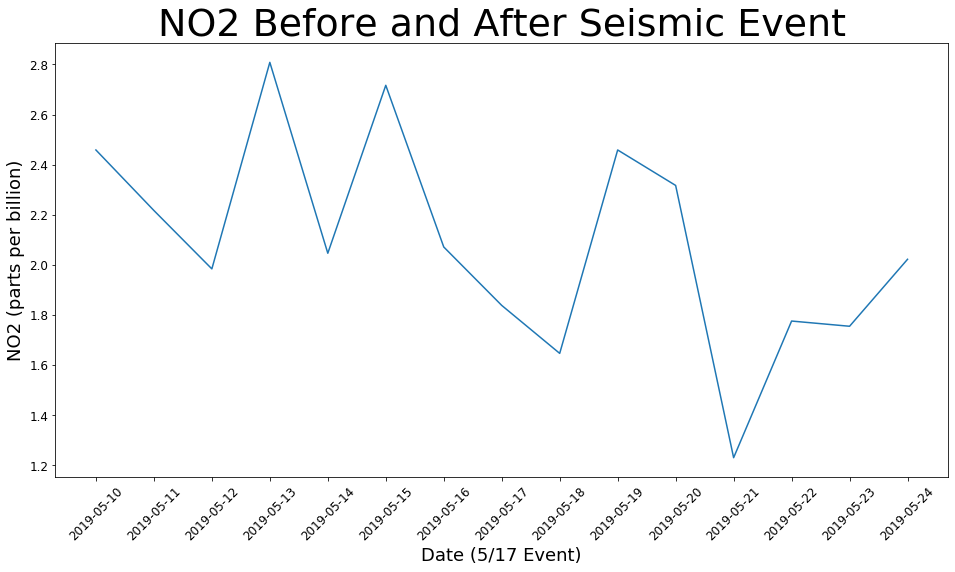

In [16]:
# Plot the NO2 data with line chart

plt.plot(record_NO2['Date'],record_NO2['Measurement'])
plt.title('{0}'.format("NO2 Before and After Seismic Event"), fontsize =38)
plt.xlabel("Date (5/17 Event)", fontsize = 18)
plt.ylabel("NO2 (parts per billion)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.xticks(rotation=45)
plt.show()


In [9]:
# Extract SO2 data from the groupby dataframe

Sulfur_Dioxide = recordgroupby_df['Parameter']=="Sulfur dioxide"
record_SO2 = recordgroupby_df[Sulfur_Dioxide]
record_SO2.head()

,Parameter,Date,Measurement
30,Sulfur dioxide,2019-05-10,1.627302
31,Sulfur dioxide,2019-05-11,0.965064
32,Sulfur dioxide,2019-05-12,0.262393
33,Sulfur dioxide,2019-05-13,0.289468
34,Sulfur dioxide,2019-05-14,0.513808


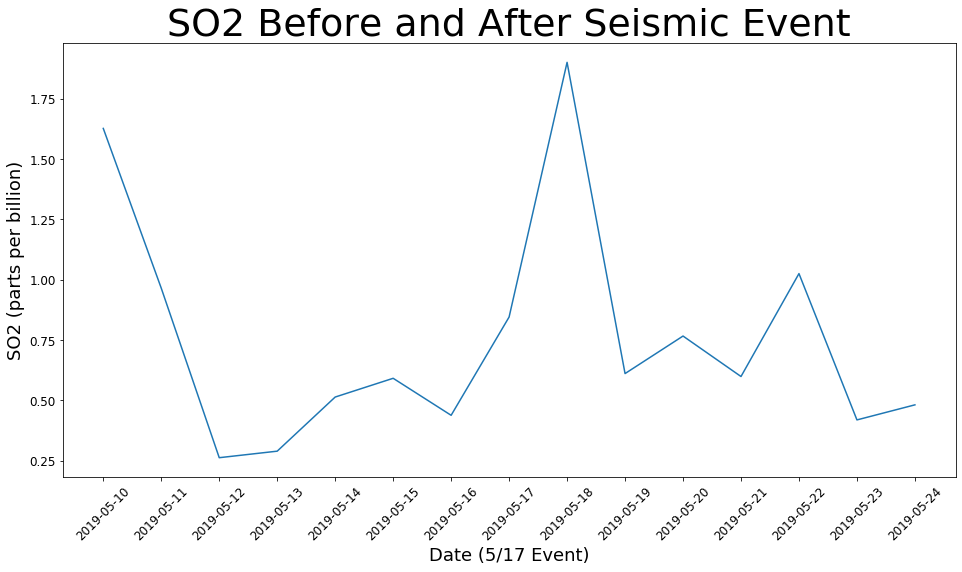

In [17]:
# Chart the SO2 Data

plt.plot(record_SO2['Date'],record_SO2['Measurement'])
plt.title('{0}'.format("SO2 Before and After Seismic Event"), fontsize =38)
plt.xlabel("Date (5/17 Event)", fontsize = 18)
plt.ylabel("SO2 (parts per billion)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.xticks(rotation=45)
plt.show()

In [11]:
# Extract Ozone from the groupby dataframe

Ozone = recordgroupby_df['Parameter']=="Ozone"
record_Ozone = recordgroupby_df[Ozone]
record_Ozone.head()

,Parameter,Date,Measurement
15,Ozone,2019-05-10,0.030109
16,Ozone,2019-05-11,0.030109
17,Ozone,2019-05-12,0.030935
18,Ozone,2019-05-13,0.034587
19,Ozone,2019-05-14,0.037370


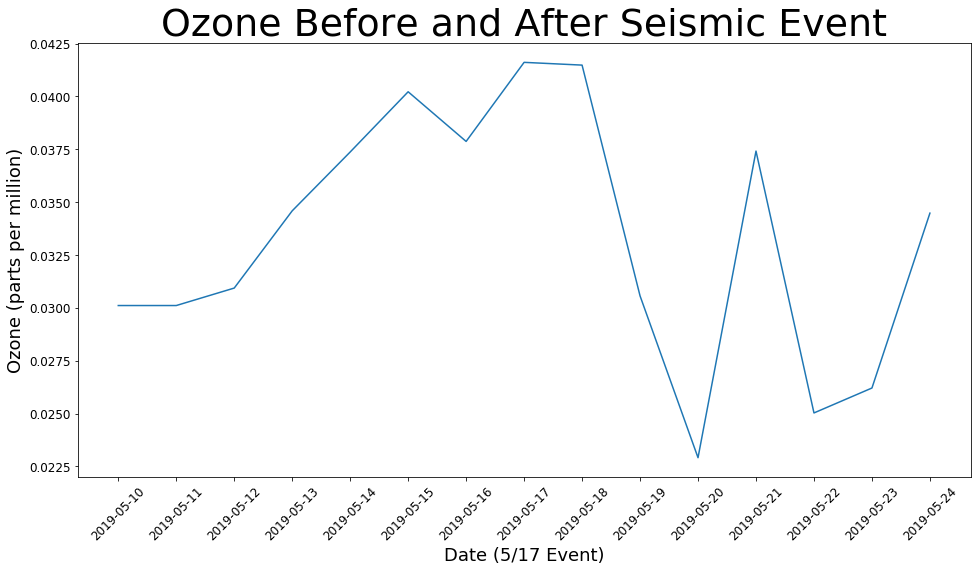

In [18]:
#Chart the Ozone Data

plt.plot(record_Ozone['Date'],record_Ozone['Measurement'])
plt.title('{0}'.format("Ozone Before and After Seismic Event"), fontsize =38)
plt.xlabel("Date (5/17 Event)", fontsize = 18)
plt.ylabel("Ozone (parts per million)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.xticks(rotation=45)
plt.show()

In [15]:
# Extract CO from the groupby dataframe

Carbon_Monoxide = recordgroupby_df['Parameter']=="Carbon monoxide"
record_CO = recordgroupby_df[Carbon_Monoxide]
record_CO.head()

,Parameter,Date,Measurement


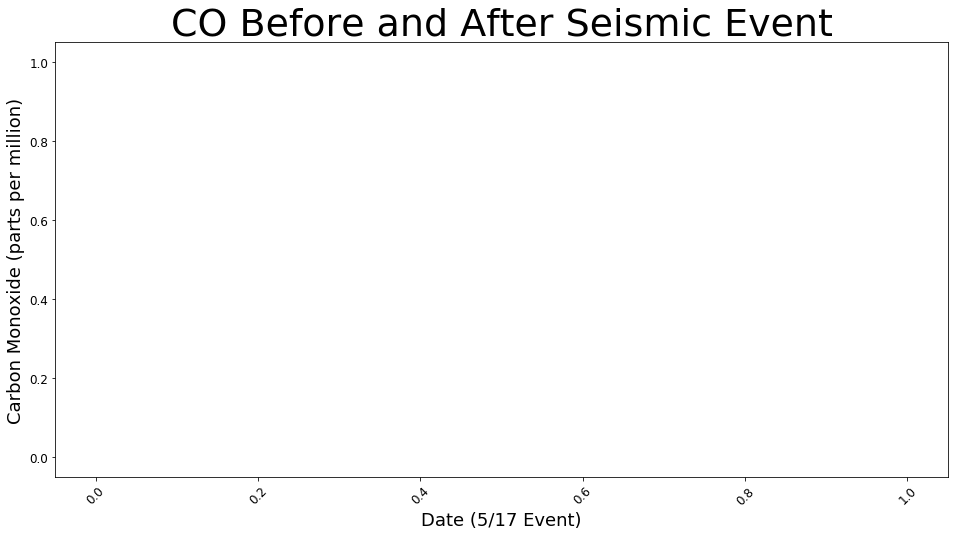

In [19]:
#Chart the Carbon Monoxide Data

plt.plot(record_CO['Date'],record_CO['Measurement'])
plt.title('{0}'.format("CO Before and After Seismic Event"), fontsize =38)
plt.xlabel("Date (5/17 Event)", fontsize = 18)
plt.ylabel("Carbon Monoxide (parts per million)", fontsize =18)
plt.rcParams["figure.figsize"] = [16,8]
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.xticks(rotation=45)
plt.show()